In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("HW2-1.csv")
print("data_len: ", len(train_data))
raw_data = train_data.values
train_data.head()

data_len:  50


,U1,U2
0,0.814291,-0.282982
1,-0.557005,-0.221874
2,0.041433,-0.271074
3,0.999120,-0.001757
4,-0.836723,-0.592460


In [3]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0 : -1]

In [4]:
class OurAnomalyDetector(tf.keras.Model):
  def __init__(self):
    super(OurAnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation = "tanh"),
      layers.Dense(16, activation = "tanh"),
      layers.Dense(8, activation = "tanh")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation = "tanh"),
      layers.Dense(16, activation = "tanh"),
      layers.Dense(2, activation = 'tanh')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = OurAnomalyDetector()

In [5]:
autoencoder.compile(optimizer = 'adam', loss = 'mae')
history = autoencoder.fit(raw_data, raw_data, epochs = 20)

Epoch 1/20
2/2 [==============================] - 1s 3ms/step - loss: 0.4687
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4102
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.3354
Epoch 4/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2962
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2423
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2055
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1760
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1649
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1434
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1095
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0858
Epoch 12/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

In [6]:
encoded_data = autoencoder.encoder(raw_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()
decoded_data

array([[ 0.74941176, -0.2903701 ],
       [-0.63376176, -0.21342829],
       [ 0.03548574, -0.3032898 ],
       [ 0.8352796 , -0.09077086],
       [-0.79888934, -0.39583656],
       [-0.23759632, -0.20301367],
       [ 0.5258926 , -0.4173003 ],
       [-0.40704057, -0.17195746],
       [ 0.4112416 , -0.4175684 ],
       [-0.80667174, -0.41293502],
       [-0.46241078, -0.17095104],
       [ 0.07139973, -0.31789654],
       [-0.7568118 , -0.32339194],
       [ 0.06331355, -0.31462228],
       [ 0.3783573 , -0.41334257],
       [ 0.41539693, -0.4179819 ],
       [ 0.4646547 , -0.42062888],
       [ 0.7064744 , -0.3384275 ],
       [ 0.6477971 , -0.37998453],
       [-0.77993447, -0.35960525],
       [-0.12702498, -0.2391178 ],
       [-0.16548964, -0.22553435],
       [ 0.37105966, -0.41218552],
       [ 0.6057415 , -0.39868236],
       [ 0.06207193, -0.31411856],
       [ 0.15804031, -0.3517675 ],
       [-0.8310533 , -0.47884336],
       [ 0.3730266 , -0.41250497],
       [-0.560771  ,

In [7]:
h = decoded_data.tolist()
x_axis = []
y_axis = []
for x in h:
    x_axis.append(x[0])
    y_axis.append(x[1])

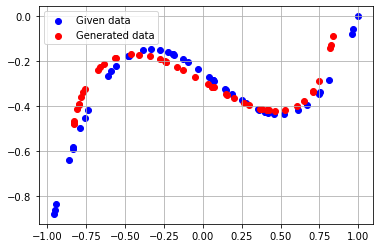

In [8]:
plt.grid()
plt.scatter(train_data['U1'], train_data['U2'], c = "blue")
plt.scatter(x_axis, y_axis, c = "red")
plt.legend(labels=["Given data", "Generated data"])
plt.show()